In [2]:
import json
dataset_path = "/user/zj2398/long_context_clues/data/mimic/meds_v0.3_reader/metadata/dataset.json"
with open(dataset_path,'r') as file:
    data = json.load(file)
print(data)

{'dataset_name': 'MIMIC-IV', 'dataset_version': '2.2', 'etl_name': 'meds_etl.mimic', 'etl_version': '0.3.6', 'meds_version': '0.3.3'}


In [2]:
import os
dir_path = os.path.dirname("/data/processed_datasets/processed_datasets/zj2398/hf_cache/tokenizers/cookbook_39k/tokenizer_config.json")
base_path = os.path.basename("/data/processed_datasets/processed_datasets/zj2398/hf_cache/tokenizers/cookbook_39k/tokenizer_config.json")
print(dir_path,base_path)


/data/processed_datasets/processed_datasets/zj2398/hf_cache/tokenizers/cookbook_39k tokenizer_config.json


In [27]:
import pandas as pd
import json
from pathlib import Path
# import error

vocabulary_path = "/home/zj2398@mc.cumc.columbia.edu/ICL_EHR/hf_ehr/cache/tokenizers/desc/tokenizer_config.json"
data_path =  "/data/processed_datasets/processed_datasets/ehr_foundation_data/ohdsi_cumc_deid/ohdsi_cumc_deid_2023q4r3_harmonized/CONCEPT.csv"

#open json file
json_path = Path(vocabulary_path)
with json_path.open("r",encoding="utf-8") as f:
    token_vocab = json.load(f)

# open mapping csv
concept_csv = pd.read_csv(
    data_path,
    sep="\t",          # or "\t" if you saw tabs
    engine="python",  # more tolerant parser
    quoting=3         # QUOTE_NONE, if you see stray quotes
)

# create lookup directary
lookup = {
    (row["vocabulary_id"], row["concept_code"]): row["concept_name"]
    for _, row in concept_csv.iterrows()
}

# with open("lookup.json", "w", encoding="utf-8") as f:
#     json.dump(lookup, f, indent=2, ensure_ascii=False)

# #     vocabulary_id = code[0]
#     concept_class_id = code[1]
#     b = concept_csv[['vocabulary_id'=='LOINC'], ['concept_class_id'=='55284-4']]

TypeError: keys must be str, int, float, bool or None, not tuple

In [1]:
import pandas as pd
file_path = "/data/raw_data/mimic/files/mimiciv/OMOP/CONCEPT.csv"
vocabulary_csv = pd.read_csv(file_path,sep='\t')
print(vocabulary_csv)

# with open("/data/raw_data/mimic/files/mimiciv/VOCABULARY.csv", "wb") as f:
#     pickle.dump(lookup, f)

# with open("lookup.json", "w", encoding="utf-8") as f:
#     json.dump(lookup, f, indent=2, ensure_ascii=False)

/tmp/ipykernel_870647/2659147647.py:3: DtypeWarning: Columns (5,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  vocabulary_csv = pd.read_csv(file_path,sep='\t')


         concept_id                                       concept_name  \
0           3541502  Adverse reaction to drug primarily affecting t...   
1           3542356  Adverse reaction to other central nervous syst...   
2           4327638                                         Borderline   
3          42538812                              Somatic hallucination   
4          40629514                                         Stillbirth   
...             ...                                                ...   
4021802    45959968  Retired SNOMED UK Drug extension concept, do n...   
4021803    45959970  Retired SNOMED UK Drug extension concept, do n...   
4021804    35632056  Retired SNOMED UK Drug extension concept, do n...   
4021805    45959988  Retired SNOMED UK Drug extension concept, do n...   
4021806    45959989  Retired SNOMED UK Drug extension concept, do n...   

           domain_id vocabulary_id     concept_class_id standard_concept  \
0          Condition        SNOMED 

In [51]:
import pickle
with open("lookup.pkl", "rb") as f:
    lookup = pickle.load(f)

lookup[("ICD9CM","E03")] = "Hypothyroidism unspecified"
for token in  token_vocab['tokens']:
    code_str = token["code"].split("/")
    if len(code_str) < 2:
        token["text"] = code_str
    else:
        vocab, cls = code_str[0], code_str[1]
        rest = code_str[2:]
        # lookup concept_name
        text_des = lookup.get((vocab, cls.split(".")[0]))
        if text_des:
            # reconstruct: ConceptName + any trailing fields
            token["text"] = text_des
        else:
            # fallback to original if no match
            # if vocab == "ICD9CM":
            print(f"The token doesn't have a mapping {vocab}/{cls}")
            # else:
            # raise Exception(f"Error for not matching code {token}.")
        # if len(code_str) > 2:
        #     print(f"This code include not only code and id {token}")
# else:
#     print(f"The token doesn't have a mapping {token}")
#     # raise Exception(f"Error for only one / {token}.")

out_path = Path("/home/zj2398@mc.cumc.columbia.edu/ICL_EHR/hf_ehr/cache/tokenizers/desc/tokenizer_text_config.json")
out_path.write_text(
    json.dumps(token_vocab, indent=2, ensure_ascii=False),
    encoding="utf-8"
)

# print(f"Wrote updated tokens (with “text” fields) to {out_path}")

The token doesn't have a mapping ICD9CM/E88.00
The token doesn't have a mapping ICD9CM/E81.00
The token doesn't have a mapping ICD9CM/E99.00
The token doesn't have a mapping ICD9CM/E87.00
The token doesn't have a mapping ICD9CM/E90.00
The token doesn't have a mapping ICD10CM/NoD.x0
The token doesn't have a mapping ICD9CM/E84.00
The token doesn't have a mapping ICD9CM/E97.00
The token doesn't have a mapping Gender/Unknown
The token doesn't have a mapping ICD9CM/E96.00
The token doesn't have a mapping ICD9CM/E91.00
The token doesn't have a mapping Ethnicity/Unknown
The token doesn't have a mapping ICD9CM/E82.00
The token doesn't have a mapping ICD9CM/E98.00
The token doesn't have a mapping ICD9CM/E85.00
The token doesn't have a mapping Race/Unknown
The token doesn't have a mapping ICD9CM/E89.00
The token doesn't have a mapping ICD9CM/E86.00
The token doesn't have a mapping ICD9CM/E95.00
The token doesn't have a mapping ICD10PCS/NoPCS
The token doesn't have a mapping ICD9CM/E92.00


41768160

In [53]:
# ICD10PCS/0NU70JZ
# print(concept_csv['concept_code'].unique)

# mask = (concept_csv["concept_code"] == "0NU70JZ")

# # mask = (concept_csv["vocabulary_id"] == "ICD10PCS")
# ICD10CM/E07.10
# ICD10CM/S72.8X2A
# print(concept_csv.loc[mask]["vocabulary_id"])ICD9CM/E03.00

def mapping(concept,vocab_id,concept_code):
    mask = (concept_csv["vocabulary_id"] == vocab_id) & (concept_csv["concept_code"] == concept_code)
    print(f"{vocab_id}/{concept_code} is {concept_csv.loc[mask]['concept_name']}")

# mapping(concept_csv,"ICD10CM","S72.8X2A")
# mapping(concept_csv,"ICD10CM","S72")
mapping(concept_csv,"ICD9CM","E85")

# mask = (concept_csv["vocabulary_id"] == "ICD10CM") & (concept_csv["concept_code"] == "S72.8X2A")
# print(concept_csv.loc[mask]['concept_name'])
# a = 'abc.cd'
# print(a.split(".")[0])

ICD9CM/E85 is Series([], Name: concept_name, dtype: object)


In [18]:
print(concept_csv.iloc[5106677])

concept_id                                                   43020136
concept_name        New Technology @ Anatomical Regions @ Introduc...
domain_id                                                   Procedure
vocabulary_id                                                ICD10PCS
concept_class_id                                   ICD10PCS Hierarchy
standard_concept                                                    S
concept_code                                                   XW0DX8
valid_start_date                                           1970-01-01
valid_end_date                                             2099-12-31
invalid_reason                                                    NaN
Name: 5106677, dtype: object


In [7]:
vocab = "ICD10PCS"
class_id = "0NU70JZ"
name = lookup.get((vocab, class_id))
print(name)

None


In [1]:
import pandas as pd

codes_path = "/data/processed_datasets/processed_datasets/ehr_foundation_data/ohdsi_cumc_deid/ohdsi_cumc_deid_2023q4r3_v3_mapped/models/femr/motor_large_no_visit_id_8192/results/AMI/motor_730/features_with_label/train.parquet"
# Read a Parquet file into a DataFrame
df = pd.read_parquet(codes_path)

# Display the first few rows
# print(df['code']['NDC/00904655304'])
print(df)

# row = df[df['code'] == 'MIMIC_IV_ITEM/227366']
# print(row)

# # Example: Filtering data
# filtered_df = df[df['column_name'] > threshold_value]

# # Example: Grouping data
# grouped_df = df.groupby('another_column').mean()

# # Example: Writing back to Parquet
# df.to_parquet('output.parquet')

       subject_id            prediction_time  boolean_value  \
0             610 2015-01-04 11:00:00.000000              0   
1             610 2015-02-09 09:00:00.000000              0   
2             610 2015-02-17 12:36:00.100270              0   
3             610 2015-02-23 12:00:00.100310              0   
4             610 2015-04-05 09:00:00.000000              0   
...           ...                        ...            ...   
99995    15624238 2007-04-16 10:12:00.026099              0   
99996    15624238 2007-05-04 15:13:00.026119              0   
99997    15624238 2010-06-14 08:09:00.026439              0   
99998    15624238 2010-06-23 15:46:00.026459              0   
99999    15624238 2016-07-26 13:00:00.000000              0   

                                                features  
0      [-0.26804277, 0.57270885, 0.621494, -1.6908522...  
1      [1.4845291, 1.2546103, 0.32245922, 1.2525007, ...  
2      [1.1361039, 1.1925557, 0.51551557, 0.93580884,...  
3      

Sequences shorter than 2048: 95.94%
Sequences shorter than 4096: 98.08%
Sequences shorter than 8192: 99.21%
50th Percentile: 13
90th Percentile: 663
95th Percentile: 1636
99th Percentile: 6885
For train dataset: the maximum length is 248586


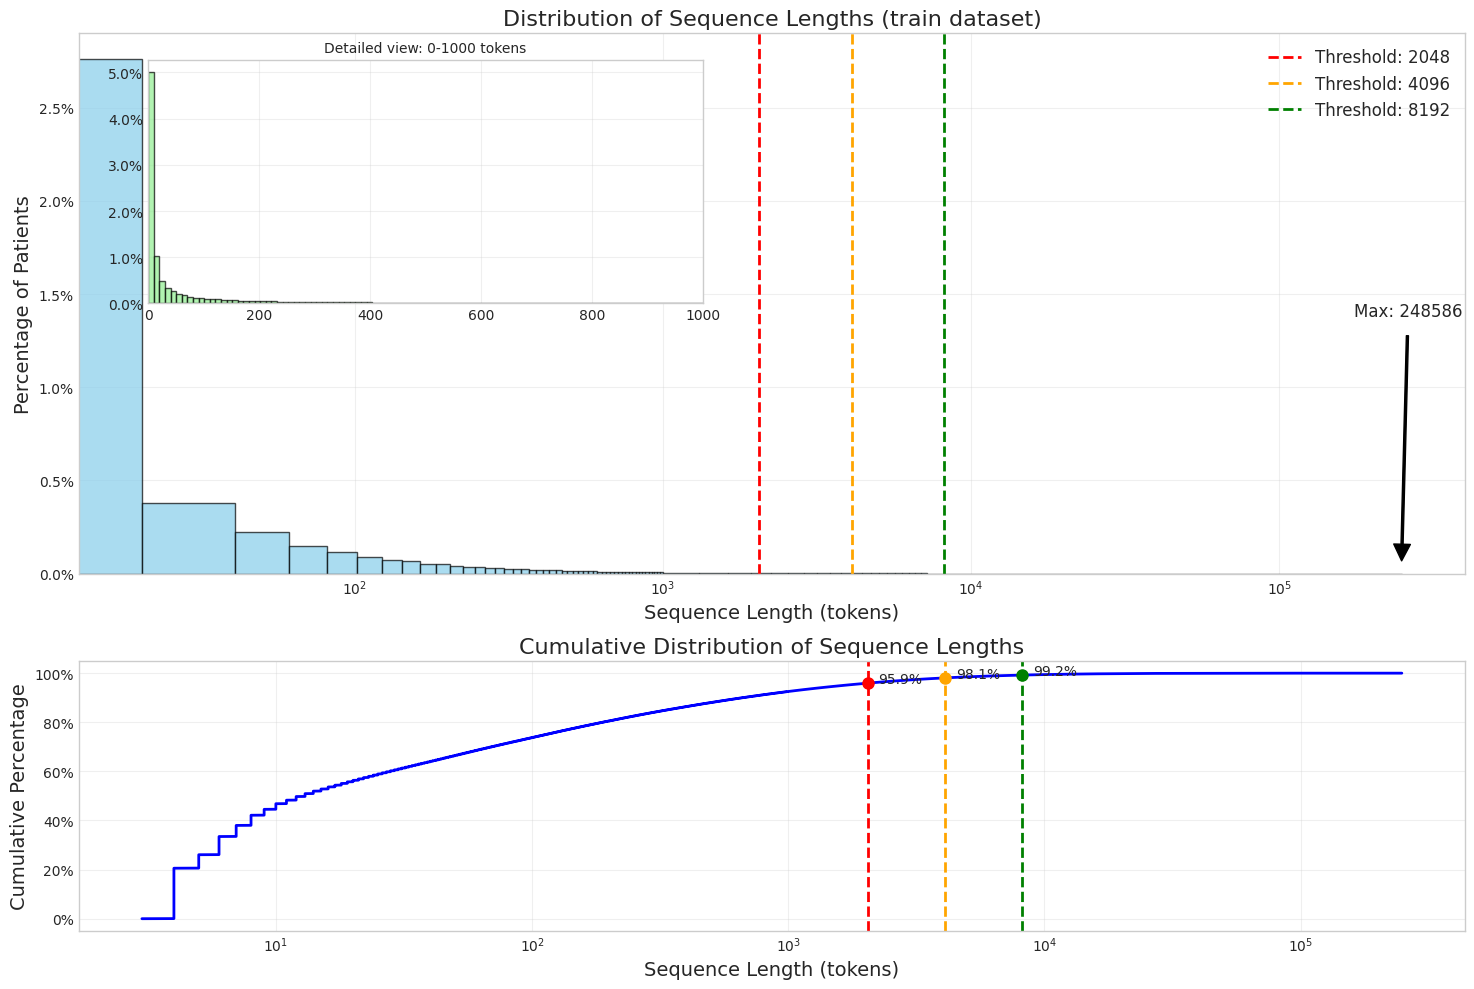

In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.gridspec as gridspec

# Path to your data
dir_path = "/home/zj2398@mc.cumc.columbia.edu/ICL_EHR/hf_ehr/cache/tokenizers/cookbook_39k/versions/2025-04-08_00-21-55/datasets"

# Create a figure with subplots - one for histogram, one for CDF
# Use a clean style for better visibility
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    # Fallback for newer matplotlib versions
    plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

# You can replace datasets with ["train","val","test"]
datasets = ["train"]
for dataset in datasets:
    # Load data
    json_file = os.path.join(dir_path, dataset, "seq_length_per_patient.json")
    with open(json_file, 'r') as f:
        seq_length_per_patient = json.load(f)["seq_lengths"]
    
    data_array = np.array(seq_length_per_patient)
    total_count = len(data_array)
    
    # Calculate thresholds and percentiles
    thresholds = [2048, 4096, 8192]
    for t in thresholds:
        count = np.sum(data_array < t)
        print(f"Sequences shorter than {t}: {count / total_count * 100:.2f}%")
    
    percentiles = [50, 90, 95, 99]
    percentile_values = np.percentile(data_array, percentiles)
    for p, val in zip(percentiles, percentile_values):
        print(f"{p}th Percentile: {val:.0f}")
    
    print(f"For {dataset} dataset: the maximum length is {max(data_array)}")
    
    # Histogram with percentage on y-axis
    ax1 = plt.subplot(gs[0])
    
    # Custom bins to better visualize both small and large values
    # Create more bins in the 0-1000 range for detailed view
    small_bins = np.linspace(0, 1000, 50)  # 50 bins for 0-1000 range
    medium_bins = np.linspace(1000, 10000, 30)  # 30 bins from 1000-10000
    large_bins = np.logspace(np.log10(10000), np.log10(data_array.max()+1000), 20)  # Log-spaced bins for the tail
    
    # Combine the bins and remove duplicates
    custom_bins = np.unique(np.concatenate([small_bins, medium_bins, large_bins]))
    
    # Create histogram with percentage
    counts, bins, patches = ax1.hist(
        data_array, 
        bins=custom_bins,
        density=True,  # Normalize to probability density
        alpha=0.7,
        color='skyblue',
        edgecolor='black'
    )
    
    # Convert density to percentage (multiply by 100)
    ax1.yaxis.set_major_formatter(PercentFormatter(1, decimals=1))
    
    # Add vertical lines for thresholds
    colors = ['red', 'orange', 'green']
    for t, c in zip(thresholds, colors):
        ax1.axvline(x=t, color=c, linestyle='--', linewidth=2, 
                   label=f'Threshold: {t}')
    
    # Set log scale for x-axis to better visualize the long tail
    ax1.set_xscale('log')
    
    # Add a secondary plot with linear scale for better visualization of 0-1000 range
    # Create an inset axes
    axins = ax1.inset_axes([0.05, 0.5, 0.4, 0.45])  # [x, y, width, height] in normalized coordinates
    
    # Plot the histogram for 0-1000 range with linear scale
    small_bins = np.linspace(0, 1000, 100)  # 100 bins for even more detail
    axins.hist(data_array, bins=small_bins, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
    
    # Set the limits to focus on 0-1000 range
    axins.set_xlim(0, 1000)
    
    # Format the inset
    axins.set_title("Detailed view: 0-1000 tokens", fontsize=10)
    axins.grid(True, alpha=0.3)
    axins.yaxis.set_major_formatter(PercentFormatter(1, decimals=1))
    
    # Add labels and title
    ax1.set_title(f"Distribution of Sequence Lengths ({dataset} dataset)", fontsize=16)
    ax1.set_xlabel("Sequence Length (tokens)", fontsize=14)
    ax1.set_ylabel("Percentage of Patients", fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=12)
    
    # Annotate max value
    ax1.annotate(f'Max: {max(data_array)}', 
                xy=(max(data_array), 0), 
                xytext=(max(data_array)*0.7, max(counts)*0.5),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
                fontsize=12)
    
    # CDF plot (second subplot)
    ax2 = plt.subplot(gs[1])
    
    # Calculate the CDF
    sorted_data = np.sort(data_array)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Plot the CDF
    ax2.plot(sorted_data, cdf * 100, 'b-', linewidth=2, label='CDF')
    
    # Add vertical lines for thresholds on CDF plot
    for t, c in zip(thresholds, colors):
        ax2.axvline(x=t, color=c, linestyle='--', linewidth=2)
        # Find the CDF value at this threshold
        idx = np.searchsorted(sorted_data, t)
        if idx < len(sorted_data):
            cdf_at_threshold = cdf[idx] * 100
            ax2.plot([t], [cdf_at_threshold], 'o', color=c, markersize=8)
            ax2.annotate(f'{cdf_at_threshold:.1f}%', 
                        xy=(t, cdf_at_threshold),
                        xytext=(t*1.1, cdf_at_threshold),
                        fontsize=10)
    
    # Set log scale for x-axis to match the histogram
    ax2.set_xscale('log')
    
    # Add labels
    ax2.set_xlabel("Sequence Length (tokens)", fontsize=14)
    ax2.set_ylabel("Cumulative Percentage", fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.set_title("Cumulative Distribution of Sequence Lengths", fontsize=16)
    
    # Set y-axis to percentage
    ax2.yaxis.set_major_formatter(PercentFormatter())
    
plt.tight_layout()
plt.savefig("sequence_length_distribution.png", dpi=300, bbox_inches='tight')
plt.show()